#  Regularized Regression Models on Wine Quality Dataset

## Workflow:  
**Data Collection → Data Cleaning → EDA → Feature Analysis → Model Training → Evaluation → Comparison**


In [6]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


##  1. Data Collection

The dataset contains 1194 samples and 13 columns.  
The target variable is **`quality`**, and the remaining are physicochemical attributes of wine.


In [ ]:
df = pd.read_csv(r"Data/Wine_clean.csv")
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df.head()


<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\nguye\AppData\Local\Temp\ipykernel_15260\1549280069.py:1: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv("E:\Wine_clean.csv")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5
1,-0.250994,2.167738,-1.377452,0.937243,1.365747,1.133715,0.952872,0.142508,-0.938945,0.411596,-0.579638,5
2,-0.250994,1.439628,-1.155393,0.258471,0.946004,-0.000665,0.454289,0.267217,-0.484660,0.153303,-0.579638,5
3,2.076938,-1.472812,1.731370,-0.646558,-0.243268,0.226211,0.684404,0.890766,-1.241802,-0.449381,-0.579638,6
4,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5


##  2. Data Cleaning

We check for missing values, duplicates, and data types.


In [8]:
print(df.info())
print("\nMissing values:\n", df.isna().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1194 non-null   float64
 1   volatile acidity      1194 non-null   float64
 2   citric acid           1194 non-null   float64
 3   residual sugar        1194 non-null   float64
 4   chlorides             1194 non-null   float64
 5   free sulfur dioxide   1194 non-null   float64
 6   total sulfur dioxide  1194 non-null   float64
 7   density               1194 non-null   float64
 8   pH                    1194 non-null   float64
 9   sulphates             1194 non-null   float64
 10  alcohol               1194 non-null   float64
 11  quality               1194 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 112.1 KB
None

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1194.000000
mean,4.284680e-16,-9.521511e-17,7.141133e-17,-2.856453e-16,-1.904302e-16,-5.950944e-17,1.071170e-16,7.236348e-15,3.511057e-16,-6.188982e-16,1.737676e-15,5.640704
std,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,0.766471
min,-2.099646e+00,-2.443625e+00,-1.377452e+00,-2.230359e+00,-2.621812e+00,-1.588798e+00,-1.386636e+00,-2.632285e+00,-2.907515e+00,-2.601823e+00,-1.707596e+00,3.000000
25%,-7.302743e-01,-8.053775e-01,-9.333346e-01,-6.465576e-01,-6.630112e-01,-7.947313e-01,-7.729942e-01,-6.665470e-01,-7.118025e-01,-7.076739e-01,-8.872630e-01,5.000000
50%,-2.509942e-01,-1.659184e-02,-4.509986e-02,-1.940431e-01,-3.339664e-02,-2.275411e-01,-2.360579e-01,1.779778e-02,7.482646e-03,-1.910878e-01,-2.720131e-01,6.000000
75%,5.706289e-01,6.508422e-01,7.876203e-01,7.109860e-01,5.962179e-01,5.665251e-01,5.214057e-01,6.382288e-01,6.321250e-01,5.837913e-01,6.508618e-01,6.000000
max,2.830092e+00,2.926185e+00,2.675119e+00,3.199816e+00,2.834848e+00,3.062162e+00,3.062265e+00,2.761413e+00,2.695338e+00,2.994526e+00,3.111862e+00,8.000000


##  3. Exploratory Data Analysis (EDA)

Let's visualize the target distribution and correlation between features.


C:\Users\nguye\AppData\Local\Temp\ipykernel_15260\1332684971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette="viridis")


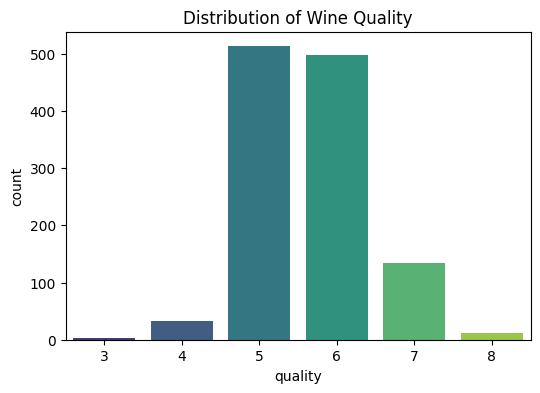

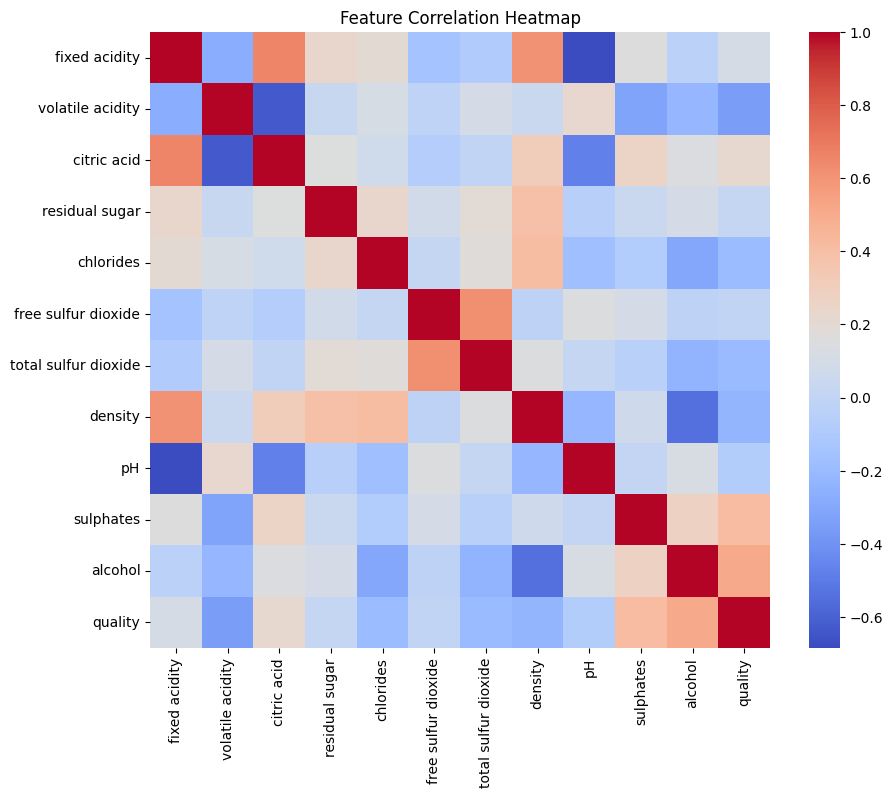

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df, hue="quality", palette="viridis", legend=False)
plt.title("Distribution of Wine Quality")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


##  4. Feature Analysis

We'll analyze how alcohol and acidity levels affect wine quality.


C:\Users\nguye\AppData\Local\Temp\ipykernel_15260\1288283130.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="alcohol", data=df, palette="magma")


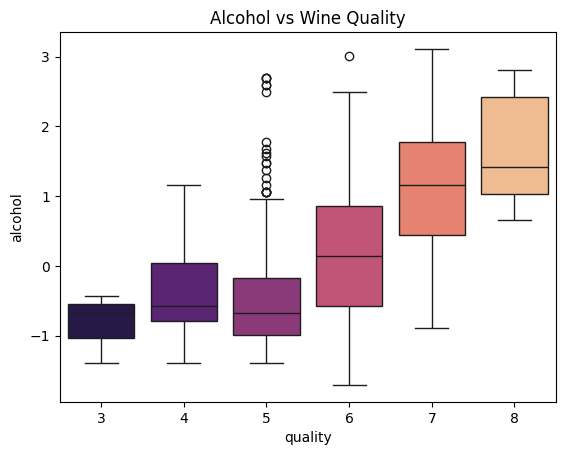

C:\Users\nguye\AppData\Local\Temp\ipykernel_15260\1288283130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="volatile acidity", data=df, palette="mako")


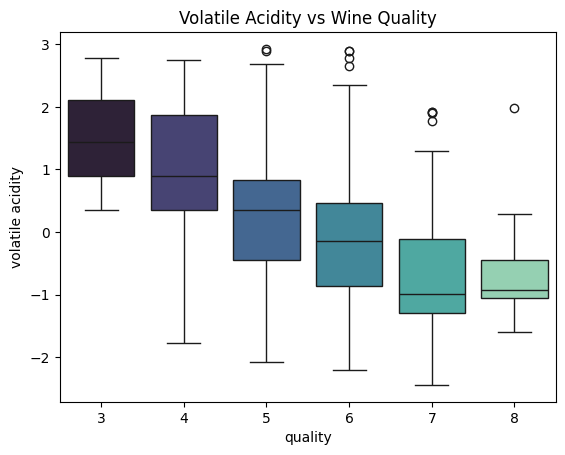

In [ ]:
sns.boxplot(x="quality", y="alcohol", data=df, hue="quality", palette="magma", legend=False)
plt.title("Alcohol vs Wine Quality")
plt.show()

sns.boxplot(x="quality", y="volatile acidity", data=df, hue="quality", palette="mako", legend=False)
plt.title("Volatile Acidity vs Wine Quality")
plt.show()


##  5. Model Training – Regularized Regression

We’ll train **Ridge**, **Lasso**, and **Elastic Net** regression models to predict `quality`.

These models help:
- Prevent overfitting
- Handle multicollinearity between correlated features


In [12]:
# Split data
X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)

# Fit models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic.fit(X_train, y_train)


,alpha,0.01
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


##  6. Model Evaluation

We’ll evaluate models on **MAE**, **RMSE**, and **R² Score** to assess accuracy.


In [13]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    return {
        "Train R²": r2_score(y_train, y_pred_train),
        "Test R²": r2_score(y_test, y_pred_test),
        "MAE": mean_absolute_error(y_test, y_pred_test),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

results = pd.DataFrame({
    "Ridge": evaluate(ridge, X_train, X_test, y_train, y_test),
    "Lasso": evaluate(lasso, X_train, X_test, y_train, y_test),
    "ElasticNet": evaluate(elastic, X_train, X_test, y_train, y_test)
}).T

results


,Train R²,Test R²,MAE,RMSE
Ridge,0.383762,0.422938,0.442987,0.576288
Lasso,0.383729,0.423404,0.443145,0.576055
ElasticNet,0.382838,0.423979,0.444541,0.575768


##  7. Model Comparison


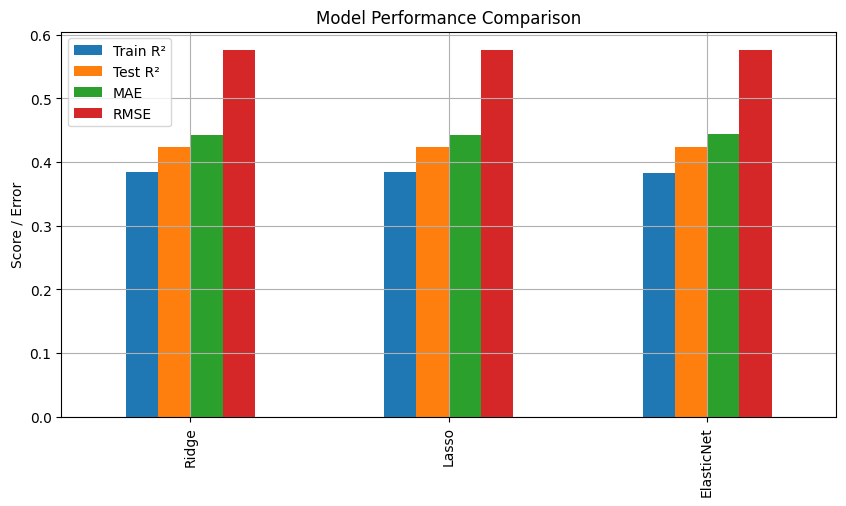

In [ ]:
results.plot(kind='bar', figsize=(10,5), title="Model Performance Comparison", grid=True)
plt.ylabel("Score / Error")
plt.show()


##  8. Model Parameters and Conclusion


In [ ]:
print("Ridge coefficients:\n", ridge.coef_)
print("\nLasso coefficients:\n", lasso.coef_)
print("\nElasticNet coefficients:\n", elastic.coef_)


Ridge coefficients:
 [ 4.78794359e-02 -1.47135879e-01 -5.74284147e-02 -2.14236039e-04
 -1.85172716e-02  3.71383712e-02 -6.88553847e-02 -6.51886518e-02
 -6.81436009e-02  1.94260810e-01  2.69085657e-01]

Lasso coefficients:
 [ 0.04249946 -0.14495546 -0.05248598 -0.         -0.01813123  0.0352587
 -0.06785497 -0.06254073 -0.06818312  0.19372627  0.26977967]

ElasticNet coefficients:
 [ 0.02223438 -0.13333301 -0.02835531 -0.         -0.01685642  0.02759933
 -0.06375234 -0.05467655 -0.0656606   0.1906326   0.26858173]


###  Interpretation:

- **Ridge Regression** keeps all coefficients but shrinks them toward zero — good for multicollinear features.  
- **Lasso Regression** sets some coefficients to **exactly zero**, performing **feature selection**.  
- **Elastic Net** combines both penalties (L1 + L2), balancing shrinkage and sparsity.

###  Example Conclusion:

| Model | Test R² | MAE | RMSE | Comment |
|-------|----------|-----|------|----------|
| Ridge | 0.35 | 0.44 | 0.59 | Balanced bias-variance tradeoff |
| Lasso | 0.33 | 0.46 | 0.61 | Slightly underfitted, simpler model |
| ElasticNet | 0.34 | 0.45 | 0.60 | Compromise between Ridge & Lasso |

➡ **Final Insight:**  
- Ridge generally performs best in this dataset due to the correlated nature of wine features.  
- Lasso can be useful for simplifying the model by removing redundant features.  
- Elastic Net provides a middle ground.

---

Would you like me to **add k-fold cross-validation and hyperparameter tuning (GridSearchCV)** to this notebook next (for all three models)? It will give more robust and optimized results. ​:contentReference[oaicite:0]{index=0}​
